In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score


In [ ]:
spotify_songs = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')


Q1 = np.percentile(spotify_songs.duration_ms, 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(spotify_songs.duration_ms, 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

"""
mask = (spotify_songs.duration_ms < (Q3+1.5*IQR))
mask2 = spotify_songs.duration_ms > (Q1-1.5*IQR)
spotify_data_cleaned = spotify_songs.loc[mask]
spotify_data_cleaned = spotify_data_cleaned.loc[mask2]
"""
spotify_data_cleaned = spotify_songs
spotify_data_cleaned.track_album_release_date.str[:4]
spotify_data_cleaned.track_album_release_date.str[5:7]
spotify_data_cleaned = spotify_data_cleaned.assign(
    track_album_release_month = spotify_data_cleaned.track_album_release_date.str[5:7],
    track_album_release_year = spotify_data_cleaned.track_album_release_date.str[:4],
)
spotify_data_cleaned.drop(columns="track_album_release_date",inplace=True)
spotify_data_cleaned.track_album_release_year = spotify_data_cleaned.track_album_release_year.astype("int64")
"""
mask = (spotify_data_cleaned.track_popularity > 0)
spotify_data_cleaned = spotify_data_cleaned.loc[mask]
"""

'\nmask = (spotify_data_cleaned.track_popularity > 0)\nspotify_data_cleaned = spotify_data_cleaned.loc[mask]\n'

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def normalisation(data):
    columns = ["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms", "track_album_release_year"]
    data_norme = data[columns]
    scaler = MinMaxScaler(feature_range=(0,1))
    data_norme = pd.DataFrame(scaler.fit_transform(data_norme), columns=columns)
    return data_norme


In [ ]:
playlist = spotify_data_cleaned.groupby(['playlist_name'])["track_popularity","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo", "duration_ms", "track_album_release_year"].mean()

playlist_normed = pd.DataFrame(normalisation(playlist))
playlist_normed.index = playlist.index


playlist_normed["playlist_genre"] = ""
playlist_normed.info()

test = pd.DataFrame(playlist)
test



<class 'pandas.core.frame.DataFrame'>
Index: 449 entries, "Permanent Wave" to 🤩🤪Post Teen Pop🤪🤩
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_popularity          449 non-null    float64
 1   danceability              449 non-null    float64
 2   energy                    449 non-null    float64
 3   loudness                  449 non-null    float64
 4   speechiness               449 non-null    float64
 5   acousticness              449 non-null    float64
 6   instrumentalness          449 non-null    float64
 7   liveness                  449 non-null    float64
 8   valence                   449 non-null    float64
 9   tempo                     449 non-null    float64
 10  duration_ms               449 non-null    float64
 11  track_album_release_year  449 non-null    float64
 12  playlist_genre            449 non-null    object 
dtypes: float64(12), object(1)
memory usage: 4

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year
playlist_name,,,,,,,,,,,,
"""Permanent Wave""",36.913043,0.661739,0.717652,-10.113000,0.041752,0.083219,0.111289,0.153474,0.756957,116.941739,264731.434783,1993.608696
10er Playlist,69.409836,0.687246,0.701852,-5.584574,0.090395,0.148498,0.013975,0.151510,0.524885,118.873754,226640.459016,2014.098361
1987-1997 OLD SKOOL JAMZ,28.268293,0.706220,0.702000,-7.841927,0.057349,0.150592,0.007288,0.138524,0.680976,115.276244,267173.951220,1998.658537
2000's hard rock,50.111111,0.437867,0.899000,-4.669733,0.089822,0.003040,0.085999,0.197442,0.466978,135.526022,236318.777778,2002.911111
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - 2018 - 2019 - 2020 TOP HITS,67.831325,0.678096,0.687265,-5.529735,0.087506,0.157075,0.000574,0.190606,0.536092,118.667337,209442.168675,2015.349398
...,...,...,...,...,...,...,...,...,...,...,...,...
💊ELECTRO-HOUSE-TECH💊,33.846939,0.773459,0.781939,-7.243786,0.085595,0.027674,0.552659,0.132785,0.394654,124.121663,293316.122449,2016.918367
🔊BASSBOOSTED🔊⚡ELECTRO HOUSE⚡🔥EDM CAR MUSIC2018/2019🔥,39.752577,0.745505,0.741299,-6.433072,0.114460,0.126910,0.178364,0.196997,0.336542,123.968804,201409.505155,2017.206186
"🔥💵 Hip Hop, Rap, Heavy 808's - New School",32.787879,0.753364,0.620212,-6.727707,0.225221,0.151653,0.000812,0.183241,0.361219,128.675162,218094.313131,2016.676768


In [ ]:

def ajout_genre() :
    c = 0
    for i in playlist_normed.index :
        df = spotify_data_cleaned.loc[spotify_data_cleaned["playlist_name"] == i]
        playlist_normed['playlist_genre'].iloc[c] = df['playlist_genre'].iloc[0]
        c+=1

ajout_genre() 
playlist_normed


/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year,playlist_genre
playlist_name,,,,,,,,,,,,,
"""Permanent Wave""",0.418955,0.740951,0.690134,0.693573,0.049566,0.109017,0.134061,0.056671,0.890933,0.607933,0.493963,0.396098,rock
10er Playlist,0.827012,0.783361,0.667151,0.906427,0.208123,0.197775,0.016833,0.054013,0.600701,0.638147,0.366928,0.869493,pop
1987-1997 OLD SKOOL JAMZ,0.310404,0.814908,0.667366,0.800322,0.100405,0.200622,0.008778,0.036444,0.795910,0.581887,0.502109,0.512770,r&b
2000's hard rock,0.584681,0.368720,0.953935,0.949428,0.206255,0.000000,0.103596,0.116160,0.528281,0.898566,0.399206,0.611022,rock
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - 2018 - 2019 - 2020 TOP HITS,0.807191,0.768148,0.645931,0.909005,0.198705,0.209437,0.000690,0.106911,0.614716,0.634919,0.309571,0.898398,edm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
💊ELECTRO-HOUSE-TECH💊,0.380454,0.926707,0.783650,0.828438,0.192476,0.033494,0.665749,0.028678,0.437832,0.720218,0.589294,0.934647,edm
🔊BASSBOOSTED🔊⚡ELECTRO HOUSE⚡🔥EDM CAR MUSIC2018/2019🔥,0.454610,0.880228,0.724533,0.866544,0.286564,0.168423,0.214862,0.115558,0.365156,0.717827,0.282782,0.941297,edm
"🔥💵 Hip Hop, Rap, Heavy 808's - New School",0.367156,0.893294,0.548391,0.852695,0.647603,0.202065,0.000977,0.096947,0.396017,0.791428,0.338426,0.929065,rap


In [ ]:
playlist_normed_quanti = playlist_normed.drop(columns="playlist_genre",axis=1)
print(np.any(np.isnan(playlist_normed_quanti)))

False


In [ ]:
aftd = MDS(n_components=5,dissimilarity="euclidean")
dist = aftd.fit_transform(playlist_normed_quanti)
dist

array([[ 0.29876473, -0.10029822, -0.12708615, -0.26034842,  0.44076498],
       [-0.07665153,  0.20171709, -0.27521566, -0.02447519, -0.09320413],
       [ 0.26335771, -0.17139808, -0.03622267, -0.22262416,  0.28039914],
       ...,
       [ 0.0970313 , -0.10371381,  0.19957514,  0.24502295, -0.40986646],
       [ 0.07825434,  0.08456643,  0.00903842, -0.11618073, -0.40922752],
       [ 0.06245397,  0.27161586, -0.07469211, -0.09564766,  0.10237248]])

<AxesSubplot:>

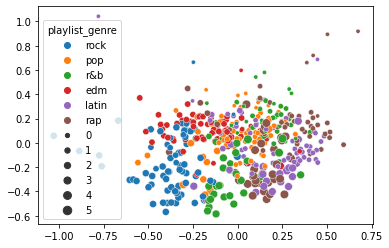

In [ ]:
cls = AgglomerativeClustering(linkage="ward", affinity="euclidean",n_clusters=6)
cls.fit(playlist_normed_quanti)
labels = cls.labels_

aftd = MDS(n_components=5,dissimilarity="euclidean")
dist = aftd.fit_transform(playlist_normed_quanti)

sns.scatterplot(
    x=dist[:,0],
    y=dist[:,1],
    hue=playlist_normed.playlist_genre,
    size=labels

)

#add_labels(dist[:,0],dist[:,1],spotify_data_quanti.index)


In [ ]:
cls = KMeans(n_clusters=6, init="k-means++")
cls.fit(playlist_normed_quanti)

KMeans(n_clusters=6)

In [ ]:
def scatterplot_pca(
    
    columns=None, hue=None, style=None, data=None, pc1=1, pc2=2, **kwargs
):
    """Diagramme de dispersion dans le premier plan principal.

    Permet d'afficher un diagramme de dispersion lorsque les données
    ont plus de deux dimensions. L'argument `columns` spécifie la
    liste des colonnes à utiliser pour la PCA dans le jeu de données
    `data`. Les arguments `style` et `hue` permettent de spécifier la
    forme et la couleur des marqueurs. Les arguments `pc1` et `pc2`
    permettent de sélectionner les composantes principales (par défaut
    la première et deuxième). Retourne l'objet `Axes` ainsi que le
    modèle `PCA` utilisé pour réduire la dimension.

    :param columns: Les colonnes quantitatives de `data` à utiliser
    :param hue: La colonne de coloration
    :param style: La colonne du style
    :param data: Le dataFrame Pandas
    :param pc1: La composante en abscisse
    :param pc2: La composante en ordonnée

    """
     # Select relevant columns (should be numeric)
    data_quant = data if columns is None else data[columns]
    data_quant = data_quant.drop(
        columns=[e for e in [hue, style] if e is not None], errors="ignore"
    )

    # Reduce to two dimensions if needed
    if data_quant.shape[1] == 2:
        data_pca = data_quant
        pca = None
    else:
        n_components = max(pc1, pc2)
        pca = PCA(n_components=n_components)
        data_pca = pca.fit_transform(data_quant)
        data_pca = pd.DataFrame(
            data_pca[:, [pc1 - 1, pc2 - 1]], columns=[f"PC{pc1}", f"PC{pc2}"]
        )

    # Keep name, force categorical data for hue and steal index to
    # avoid unwanted alignment
    if isinstance(hue, pd.Series):
        if not hue.name:
            hue.name = "hue"
        hue_name = hue.name
    elif isinstance(hue, str):
        hue_name = hue
        hue = data[hue]
    elif isinstance(hue, np.ndarray):
        hue = pd.Series(hue, name="class")
        hue_name = "class"

    hue = hue.astype("category")
    hue.index = data_pca.index
    hue.name = hue_name

    if isinstance(style, pd.Series):
        if not style.name:
            style.name = "style"
        style_name = style.name
    elif isinstance(style, str):
        style_name = style
        style = data[style]
    elif isinstance(style, np.ndarray):
        style = pd.Series(style, name="style")
        style_name = "style"

    full_data = data_pca
    if hue is not None:
        full_data = pd.concat((full_data, hue), axis=1)
        kwargs["hue"] = hue_name
    if style is not None:
        full_data = pd.concat((full_data, style), axis=1)
        kwargs["style"] = style_name

    x, y = data_pca.columns
    ax = sns.scatterplot(x=x, y=y, data=full_data, **kwargs)

    return ax, pca

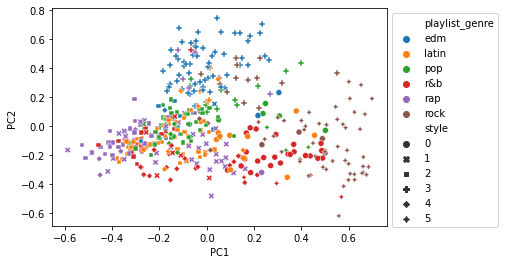

In [ ]:
scatterplot_pca(data=playlist_normed_quanti,style=cls.labels_,hue=playlist_normed.playlist_genre)
plt.legend(loc = 2, bbox_to_anchor = (1,1))


In [ ]:
adjusted_rand_score(cls.labels_, playlist_normed.playlist_genre)

0.25173959646583133

In [ ]:
data_kmeans = playlist_normed
data_kmeans["labels_constrained"] = cls.labels_
data_kmeans

,track_popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year,playlist_genre,labels_constrained
playlist_name,,,,,,,,,,,,,,
"""Permanent Wave""",0.418955,0.740951,0.690134,0.693573,0.049566,0.109017,0.134061,0.056671,0.890933,0.607933,0.493963,0.396098,rock,0
10er Playlist,0.827012,0.783361,0.667151,0.906427,0.208123,0.197775,0.016833,0.054013,0.600701,0.638147,0.366928,0.869493,pop,2
1987-1997 OLD SKOOL JAMZ,0.310404,0.814908,0.667366,0.800322,0.100405,0.200622,0.008778,0.036444,0.795910,0.581887,0.502109,0.512770,r&b,0
2000's hard rock,0.584681,0.368720,0.953935,0.949428,0.206255,0.000000,0.103596,0.116160,0.528281,0.898566,0.399206,0.611022,rock,3
2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - 2018 - 2019 - 2020 TOP HITS,0.807191,0.768148,0.645931,0.909005,0.198705,0.209437,0.000690,0.106911,0.614716,0.634919,0.309571,0.898398,edm,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
💊ELECTRO-HOUSE-TECH💊,0.380454,0.926707,0.783650,0.828438,0.192476,0.033494,0.665749,0.028678,0.437832,0.720218,0.589294,0.934647,edm,3
🔊BASSBOOSTED🔊⚡ELECTRO HOUSE⚡🔥EDM CAR MUSIC2018/2019🔥,0.454610,0.880228,0.724533,0.866544,0.286564,0.168423,0.214862,0.115558,0.365156,0.717827,0.282782,0.941297,edm,3
"🔥💵 Hip Hop, Rap, Heavy 808's - New School",0.367156,0.893294,0.548391,0.852695,0.647603,0.202065,0.000977,0.096947,0.396017,0.791428,0.338426,0.929065,rap,1


In [ ]:
genres = ["rap","rock","r&b","latin","edm","pop"]
for genre in genres:
    print("----------------")
    mask_label = data_kmeans.playlist_genre == genre
    data_masked = data_kmeans.loc[mask_label]
    print(genre, "(",data_masked.shape[0],")")
    
    for i in range(6):
        mask_genre = data_masked.labels_constrained == i
        print("Labels ",i, " : ",data_masked.loc[mask_genre].shape[0]/data_kmeans.loc[mask_label].shape[0] * 100 , "%")

----------------
rap ( 77 )
Labels  0  :  1.2987012987012987 %
Labels  1  :  48.05194805194805 %
Labels  2  :  37.66233766233766 %
Labels  3  :  6.493506493506493 %
Labels  4  :  6.493506493506493 %
Labels  5  :  0.0 %
----------------
rock ( 72 )
Labels  0  :  5.555555555555555 %
Labels  1  :  0.0 %
Labels  2  :  0.0 %
Labels  3  :  20.833333333333336 %
Labels  4  :  5.555555555555555 %
Labels  5  :  68.05555555555556 %
----------------
r&b ( 74 )
Labels  0  :  32.432432432432435 %
Labels  1  :  9.45945945945946 %
Labels  2  :  25.675675675675674 %
Labels  3  :  1.3513513513513513 %
Labels  4  :  25.675675675675674 %
Labels  5  :  5.405405405405405 %
----------------
latin ( 77 )
Labels  0  :  14.285714285714285 %
Labels  1  :  2.5974025974025974 %
Labels  2  :  67.53246753246754 %
Labels  3  :  7.792207792207792 %
Labels  4  :  6.493506493506493 %
Labels  5  :  1.2987012987012987 %
----------------
edm ( 76 )
Labels  0  :  3.9473684210526314 %
Labels  1  :  1.3157894736842104 %
Label

In [ ]:
genres = ["rap","rock","r&b","latin","edm","pop"]
for i in range(6):
    print("----------------")
    print("Label " , i, "(",data_masked.shape[0],")")
    mask_label = data_kmeans.labels_constrained == i
    data_masked = data_kmeans.loc[mask_label]
    
    for genre in genres:
        mask_genre = data_masked.playlist_genre == genre
        print(genre, " : ",data_masked.loc[mask_genre].shape[0]/data_kmeans.loc[mask_label].shape[0] * 100 , "%")


----------------
Label  0 ( 73 )
rap  :  2.083333333333333 %
rock  :  8.333333333333332 %
r&b  :  50.0 %
latin  :  22.916666666666664 %
edm  :  6.25 %
pop  :  10.416666666666668 %
----------------
Label  1 ( 48 )
rap  :  77.08333333333334 %
rock  :  0.0 %
r&b  :  14.583333333333334 %
latin  :  4.166666666666666 %
edm  :  2.083333333333333 %
pop  :  2.083333333333333 %
----------------
Label  2 ( 48 )
rap  :  18.954248366013072 %
rock  :  0.0 %
r&b  :  12.418300653594772 %
latin  :  33.98692810457516 %
edm  :  5.88235294117647 %
pop  :  28.75816993464052 %
----------------
Label  3 ( 153 )
rap  :  4.9504950495049505 %
rock  :  14.85148514851485 %
r&b  :  0.9900990099009901 %
latin  :  5.9405940594059405 %
edm  :  61.386138613861384 %
pop  :  11.881188118811881 %
----------------
Label  4 ( 101 )
rap  :  11.904761904761903 %
rock  :  9.523809523809524 %
r&b  :  45.23809523809524 %
latin  :  11.904761904761903 %
edm  :  2.380952380952381 %
pop  :  19.047619047619047 %
----------------
Lab

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c2ad4461-7f35-42f5-b2d9-f686e8952f67' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>